# Análisis Simulaciones MadGraph/Pythia8/Delphes
Los outputs están en *sim_outputs/*.

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
hep.style.use("CMS")
%matplotlib inline

In [2]:
# number of jets to take into account
n_jets = 4
# number of leptons to take into account
n_lep = 0

## Simulación con $g_{Sg} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [3]:
rootFile = "./sim_outputs/events_gSg1.root"
tree_gSg1 = dm.Converter(rootFile)
tree_gSg1.generate(jet_elements=n_jets, e_mu_elements=n_lep)
data_gSg1 = tree_gSg1.df

In [4]:
data_gSg1

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,59.124264,36.775684,25.834538,12.464561,-0.721179,-1.088550,0.818448,-1.872139,2.694282,-1.064454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.624820,-0.442118
1,147.300690,86.574066,74.758102,72.345146,-2.786659,-0.815285,0.138754,2.303769,1.144340,-2.184100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.028967,-0.168490
2,210.691544,151.491272,123.760124,54.952888,0.148491,-0.601786,-0.725501,-0.617053,1.722369,-0.159583,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.646634,0.675776
3,60.430164,40.473728,29.807789,20.222755,1.669470,1.964234,3.912116,-0.583354,2.262866,-1.459349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.809984,2.352558
4,72.214851,49.237820,45.501427,24.391779,1.567392,0.781942,2.083191,0.699755,-0.535368,-2.277074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.289978,1.508521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,77.858475,62.281216,51.788074,29.644287,1.112603,-1.218215,-2.304389,-1.926877,-2.445607,0.413572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.818995,-3.031477
49996,98.738831,89.037712,60.348270,49.458046,-2.679253,1.635671,0.213988,1.900425,0.841216,-1.100500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.053932,-0.891539
49997,211.968552,173.585617,94.496857,92.784744,-0.056843,0.208667,-2.462472,1.629370,2.473356,-0.239085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.901330,-1.804857
49998,59.870384,54.310768,40.457428,32.031105,-2.456939,-3.233360,-3.861106,-3.156985,-0.432362,0.096474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.150581,-1.423862


In [5]:
def PlotCinematicVariable(data, variable, suptitle, njets=4, save=True, plot=False, folder='Plots/', dpi=1000):
    fig, ax = plt.subplots(2,2)

    axs = {
        0: ax[0,0],
        1: ax[0,1],
        2: ax[1,0],
        3: ax[1,1],
    }

    for i in range(njets):
        rango = np.linspace(data[f'jet_{variable}{i}'].min(), data[f'jet_{variable}{i}'].max())
        axs[i].hist(data[f'jet_{variable}{i}'], bins = rango, density = True)
        axs[i].set_title(f'Jet {i}',fontsize=15)
        axs[i].grid()
        axs[i].tick_params(axis='x',labelsize=12)
        axs[i].tick_params(axis='y',labelsize=12)

    plt.suptitle(suptitle, fontsize=30)

    if plot: plt.show()
    if save: plt.savefig(f'{folder}{variable}.png',dpi=dpi)

def PlotEtaPhiPlane(data, save=True, plot=False, folder='Plots/', dpi=1000):
    fig, ax = plt.subplots(2,2)

    axs = {
        0: ax[0,0],
        1: ax[0,1],
        2: ax[1,0],
        3: ax[1,1],
    }

    for i in range(n_jets):
        rango1 = np.linspace(data[f'jet_eta{i}'].min(), data[f'jet_eta{i}'].max())
        rango2 = np.linspace(data[f'jet_phi{i}'].min(), data[f'jet_phi{i}'].max())
        axs[i].hist2d(data[f'jet_eta{i}'],data[f'jet_phi{i}'], bins = [rango1,rango2], density = True)
        axs[i].set_title(f'Jet {i}',fontsize=15)
        axs[i].grid()
        axs[i].set_xlabel(r'$\eta$',fontsize=15)
        axs[i].set_ylabel(r'$\phi$',fontsize=15)
        axs[i].tick_params(axis='x',labelsize=12)
        axs[i].tick_params(axis='y',labelsize=12)
    
    if plot: plt.show()
    if save: plt.savefig(f'{folder}etaphiplane.png',dpi=dpi)
    

def PlotMissingETVariable(data, save=True, plot=False, folder='Plots/', dpi=1000):
    fig, ax = plt.subplots(2)

    rango = np.linspace(data['missinget_met'].min(), data['missinget_met'].max())
    ax[0].hist(data['missinget_met'], bins = rango, density=True)
    ax[0].set_title(r'$\left|E_{T}^{miss}\right|$', fontsize=15)
    ax[0].grid()
    ax[0].tick_params(axis='x',labelsize=12)
    ax[0].tick_params(axis='y',labelsize=12)

    rango = np.linspace(data['missinget_phi'].min(), data['missinget_phi'].max())
    ax[1].hist(data['missinget_phi'], bins = rango, density=True)
    ax[1].set_title(r'$\phi_{E_{T}^{miss}}$', fontsize=15)
    ax[1].grid()
    ax[1].tick_params(axis='x',labelsize=12)
    ax[1].tick_params(axis='y',labelsize=12)

    if plot: plt.show()
    if save: plt.savefig(f'{folder}missinget.png',dpi=dpi)

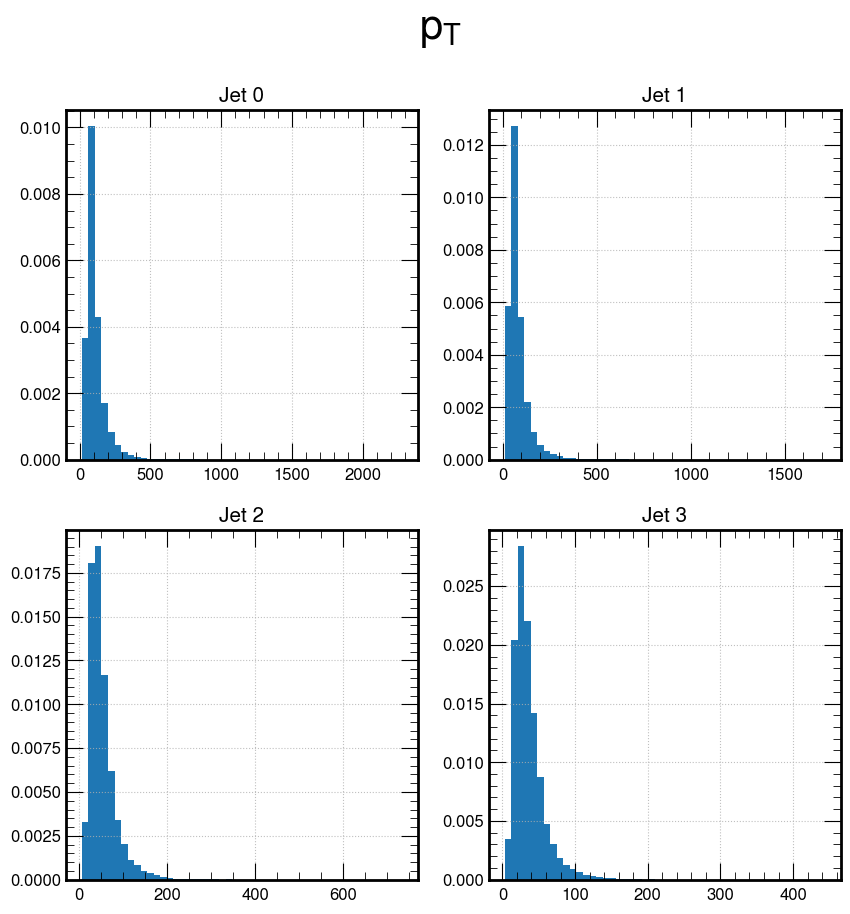

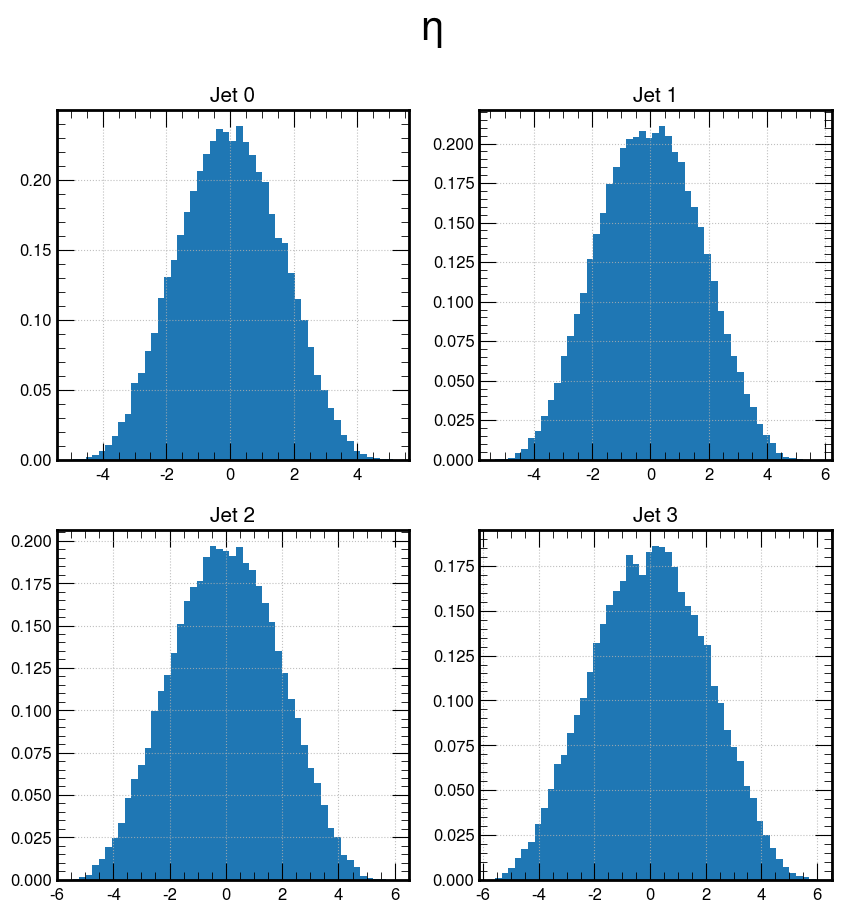

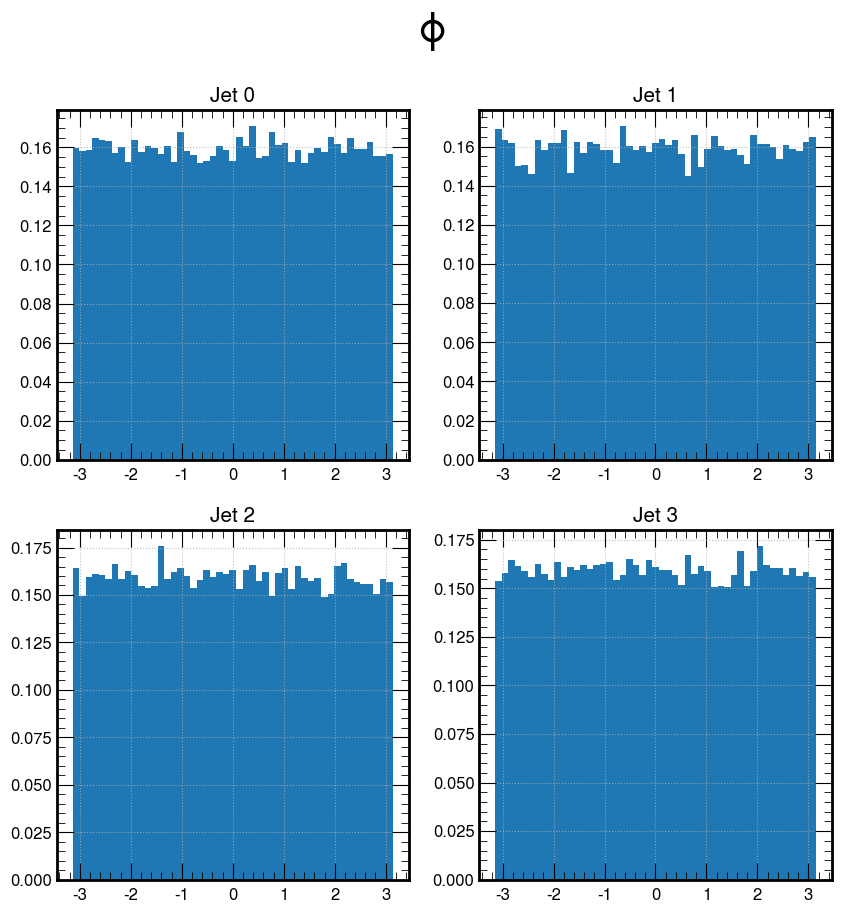

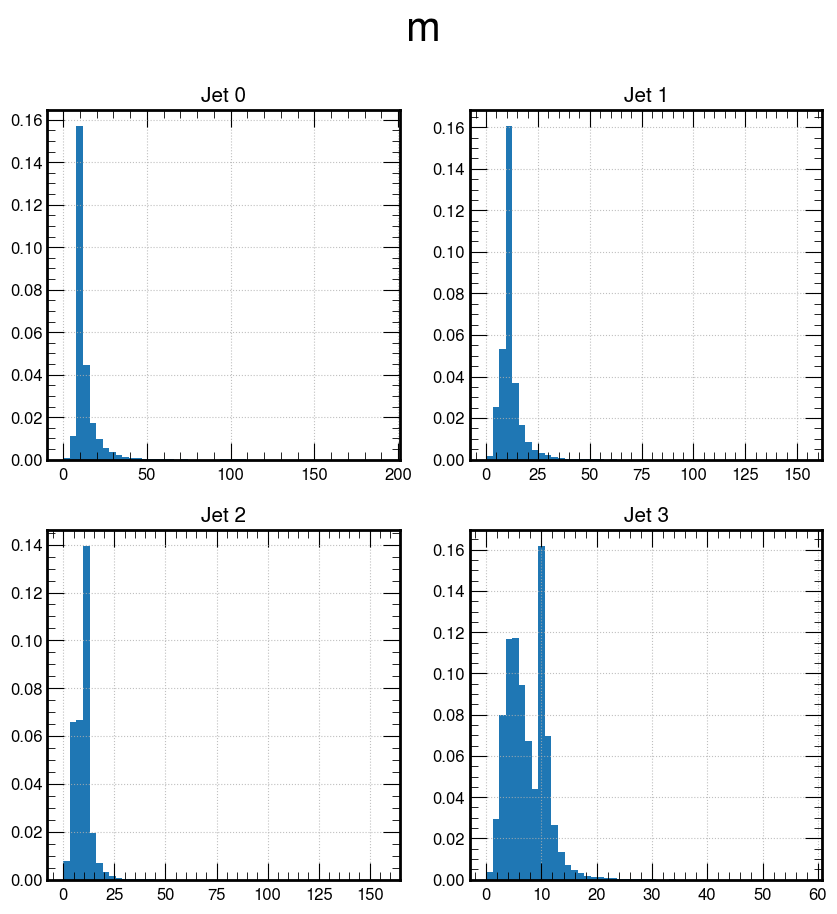

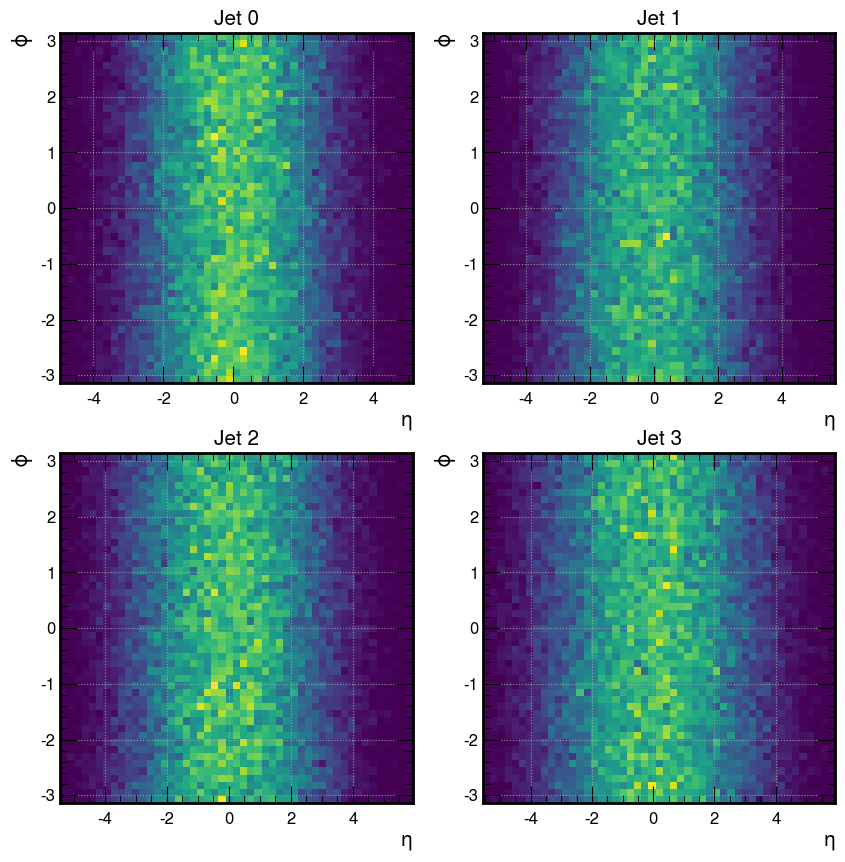

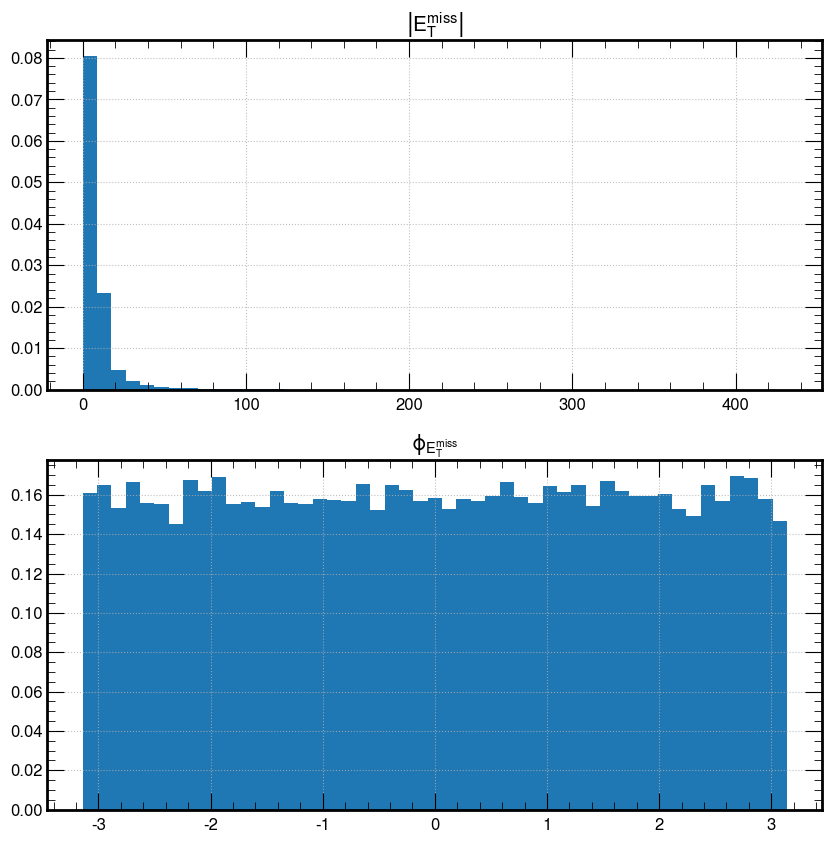

In [6]:
folder = 'Plots/gSg1/'
# pt
PlotCinematicVariable(data_gSg1, 'pt', r'$p_{T}$', folder=folder)
# eta
PlotCinematicVariable(data_gSg1, 'eta', r'$\eta$', folder=folder)
# phi
PlotCinematicVariable(data_gSg1, 'phi', r'$\phi$', folder=folder)
# mass
PlotCinematicVariable(data_gSg1, 'mass', r'$m$', folder=folder)
# Eta Phi Plane
PlotEtaPhiPlane(data_gSg1, folder=folder)
# missinget
PlotMissingETVariable(data_gSg1, folder=folder)

## Simulación con $g_{Sg1} = 1.0$ y $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [7]:
rootFile = "./sim_outputs/events_gSg.root"
tree_gSg = dm.Converter(rootFile)
tree_gSg.generate(jet_elements=n_jets, e_mu_elements=n_lep)
data_gSg = tree_gSg.df

In [8]:
data_gSg

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,951.886963,604.775269,342.881714,304.669189,-0.798037,0.181415,0.374185,-1.730007,0.914514,-2.641859,...,0,0,0,0,0,0,0,0,80.698891,0.404962
1,289.469696,256.904602,189.151306,171.028320,0.764116,-0.727704,0.217902,1.678443,0.993288,-1.393161,...,0,0,0,0,0,0,0,0,34.871017,-2.129384
2,780.320435,447.138550,275.465332,236.257370,0.216173,-0.033029,-0.366598,-0.708077,-2.539332,0.689435,...,0,0,0,0,0,0,0,0,14.311089,-0.376792
3,363.403992,306.162994,199.430878,108.294708,-0.419027,-0.819039,-1.499238,-1.854040,0.052632,2.464367,...,0,0,0,0,0,0,0,0,84.242798,2.448696
4,381.507751,301.091400,152.134354,119.301445,-1.600678,2.091575,-0.199654,-0.194851,-2.348975,1.536893,...,0,0,0,0,0,0,0,0,14.626813,-1.551274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,725.562134,568.964905,260.794128,163.468964,-0.527338,-1.879371,0.984373,0.800233,0.993676,-2.657315,...,0,0,0,0,0,0,0,0,79.022453,1.083507
49996,809.073059,784.363037,131.331802,63.535065,0.524225,0.445675,1.126382,0.721140,0.127022,-3.065837,...,0,0,0,0,0,0,0,0,62.113350,-2.453938
49997,255.102814,188.642975,182.842819,142.341034,-0.887782,1.575380,0.701641,-1.258462,0.026849,2.497406,...,0,0,0,0,0,0,0,0,81.577736,2.494076
49998,219.056503,196.666733,96.391663,25.120583,1.681531,1.433274,-0.901350,0.446066,-2.443181,1.074225,...,0,0,0,0,0,0,0,0,10.313985,2.906423


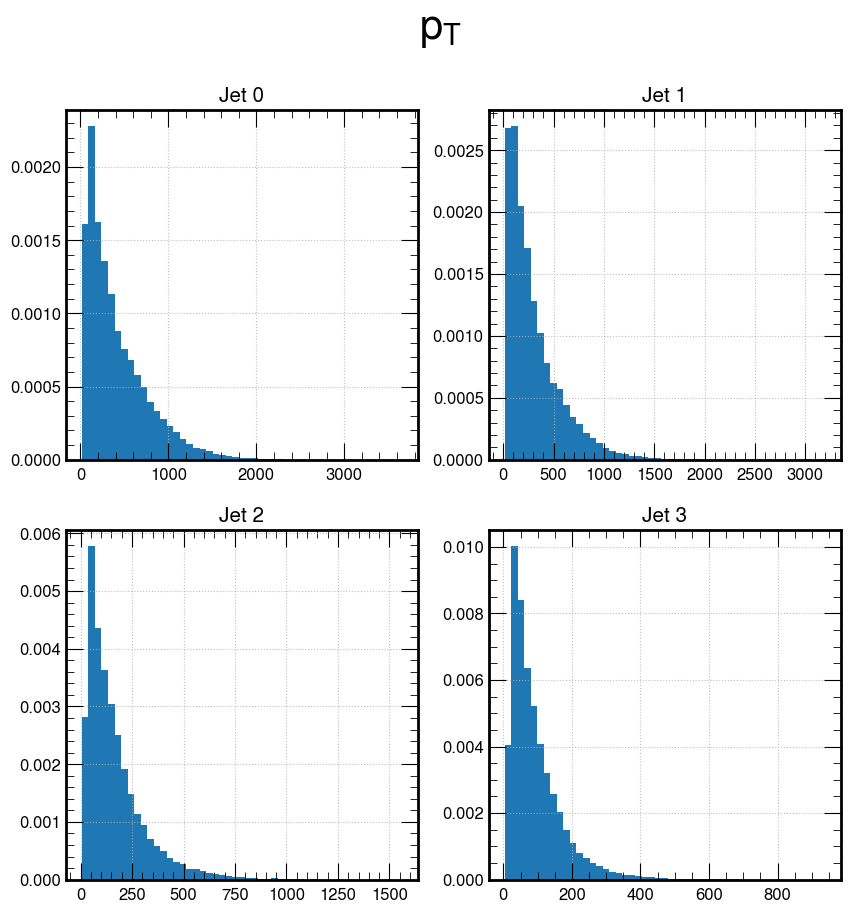

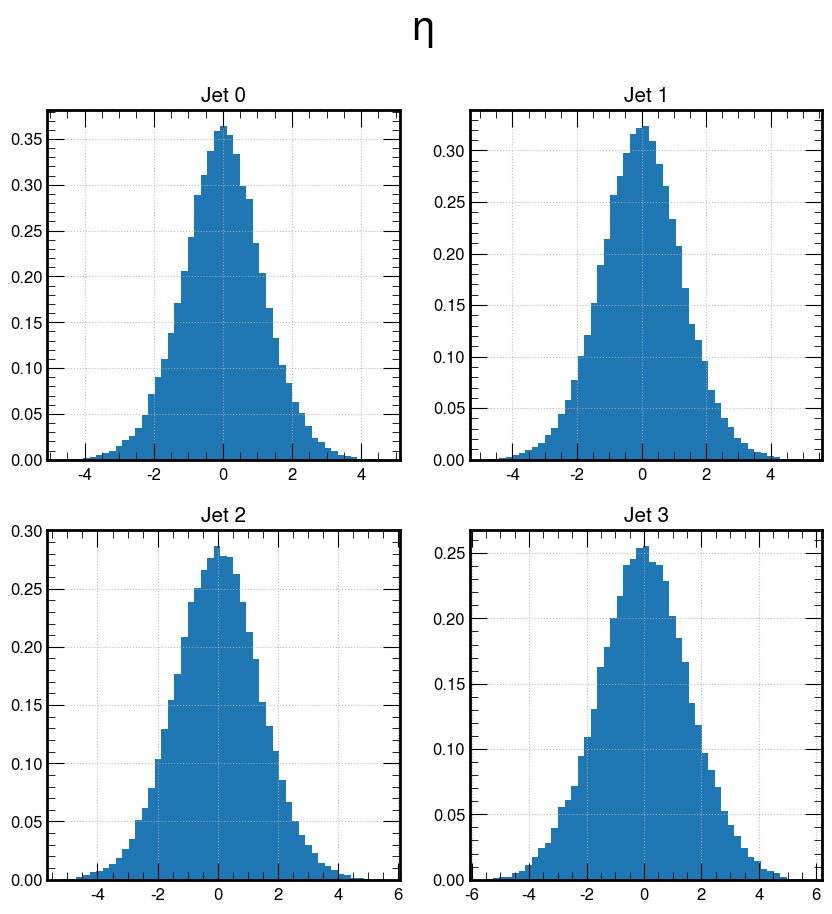

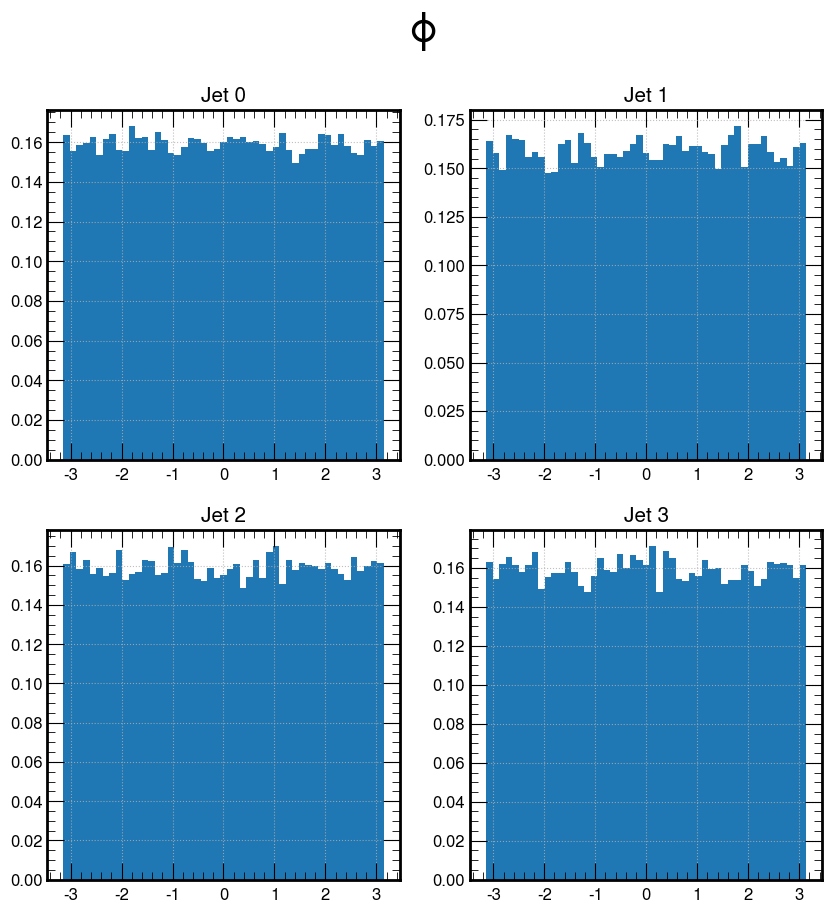

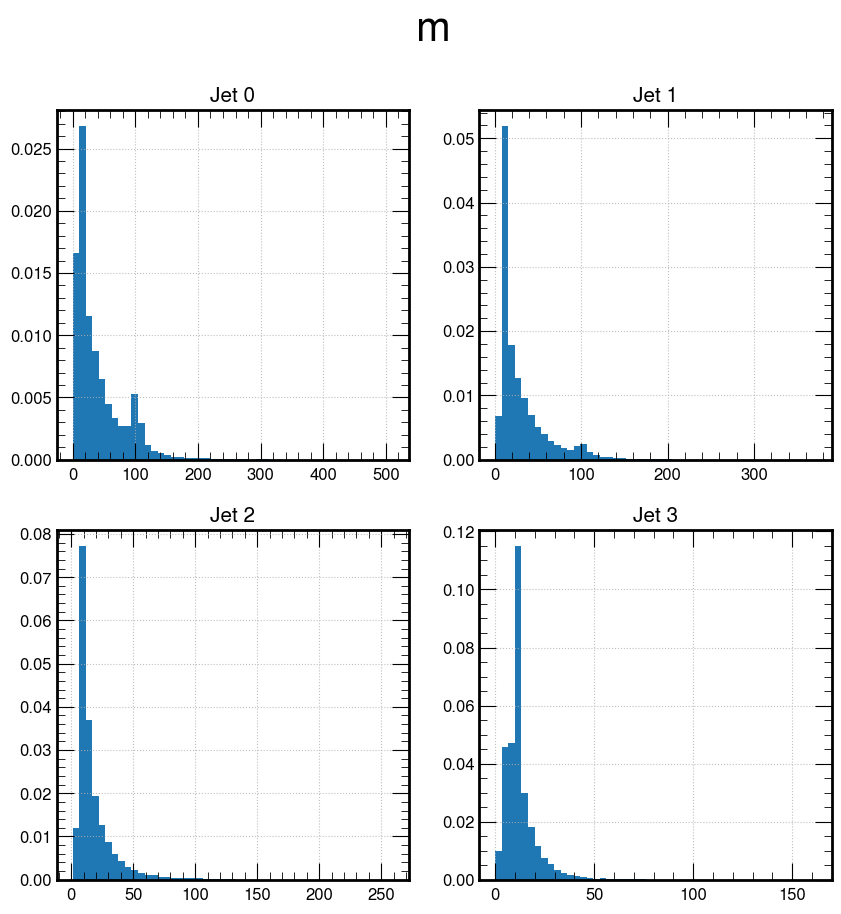

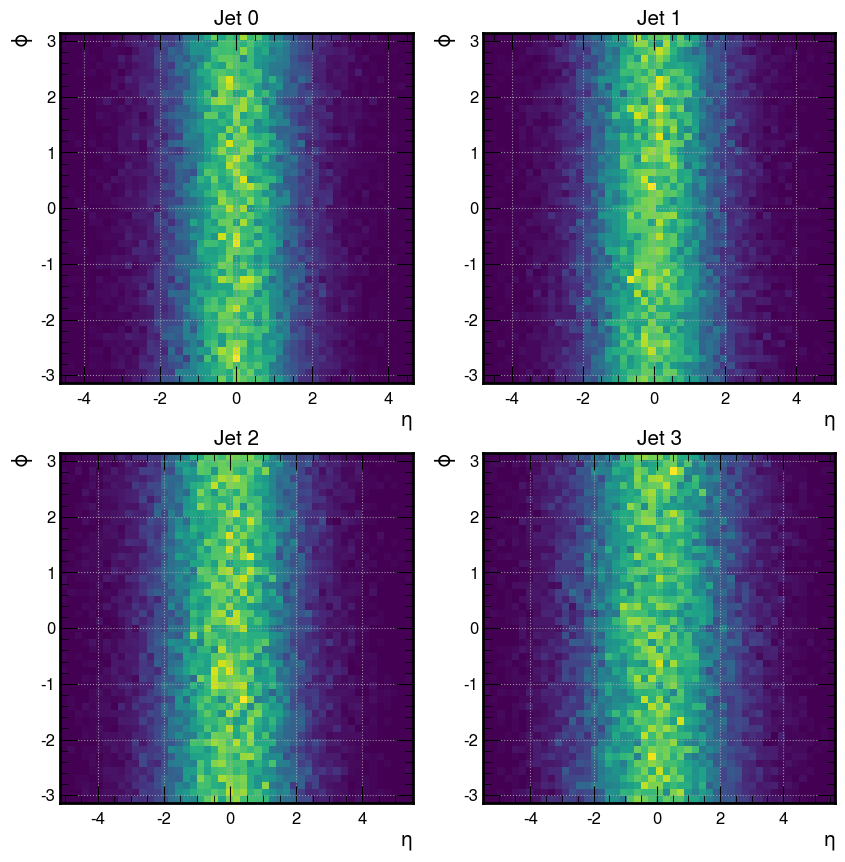

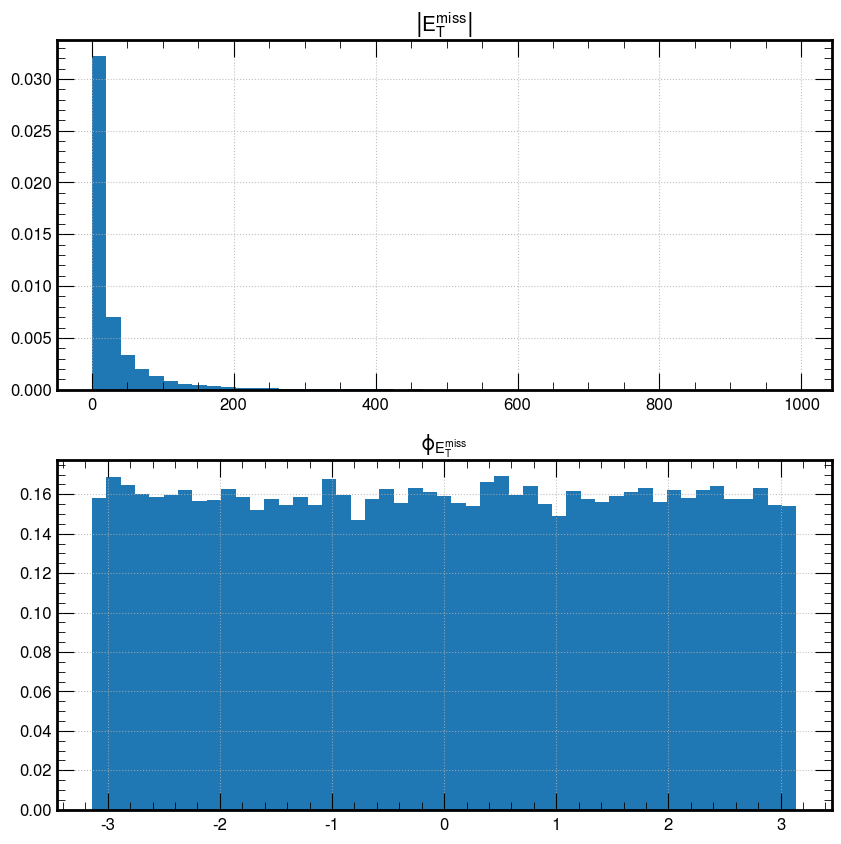

In [9]:
folder = 'Plots/gSg/'
# pt
PlotCinematicVariable(data_gSg, 'pt', r'$p_{T}$', folder=folder)
# eta
PlotCinematicVariable(data_gSg, 'eta', r'$\eta$', folder=folder)
# phi
PlotCinematicVariable(data_gSg, 'phi', r'$\phi$', folder=folder)
# mass
PlotCinematicVariable(data_gSg, 'mass', r'$m$', folder=folder)
# Eta Phi Plane
PlotEtaPhiPlane(data_gSg, folder=folder)
# missinget
PlotMissingETVariable(data_gSg, folder=folder)

## Simulación con $g_{Sq} = 1.0$ únicamente
$q = u,d,c,s,b,t$



Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [10]:
rootFile = "./sim_outputs/events_gSq.root"
tree_gSq = dm.Converter(rootFile)
tree_gSq.generate(jet_elements=n_jets, e_mu_elements=n_lep)
data_gSq = tree_gSq.df

In [11]:
data_gSq

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,66.054955,59.200031,56.483852,48.494820,0.276041,0.226234,-0.535399,-1.360582,1.554114,-1.557698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.105251,0.030935
1,87.614861,55.748848,36.955799,30.182322,1.475717,2.076140,-0.382110,-3.372679,-1.313491,1.668339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.844873,1.646728
2,62.871624,40.943913,37.460381,30.053883,-3.062544,-0.071601,-2.543246,1.318490,-2.847053,1.674365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.720967,-1.645786
3,119.990433,52.829948,50.953785,48.132088,1.935093,-1.309974,1.428643,-0.152922,-1.537144,2.146160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.872704,1.113125
4,63.607655,55.600090,48.059231,37.629520,-0.811885,0.760269,0.585453,1.876560,2.031689,-0.455909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.134085,0.123242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,54.793785,46.225067,32.537868,27.213228,1.982186,1.155096,2.366252,2.163809,2.779756,-1.131982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.456963,-0.085039
49996,60.211296,55.178513,51.171432,42.158413,0.640955,0.263604,2.018253,0.908194,-0.669854,3.139305,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.937557,-0.016964
49997,52.117207,35.243446,23.853052,20.757769,0.300340,-0.172938,-0.266626,-2.577515,-2.376223,0.401338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.531385,0.736187
49998,73.580643,64.743256,61.150791,24.861702,0.220792,-0.657232,-1.682177,-0.298858,-1.261994,1.196639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.007365,3.123713


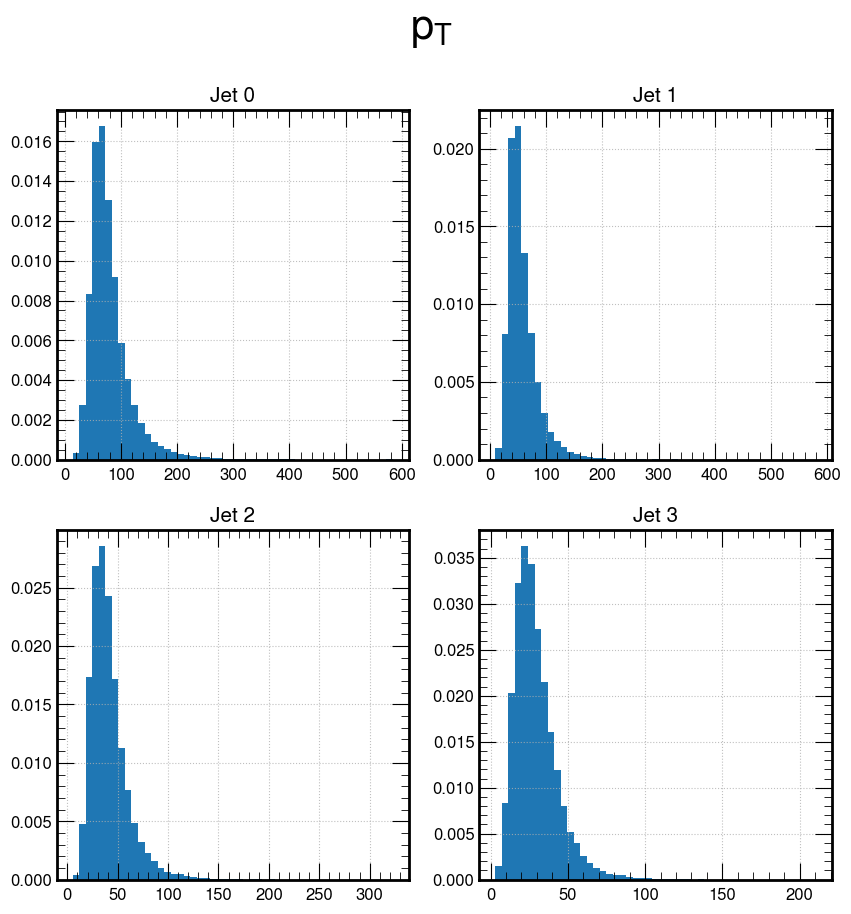

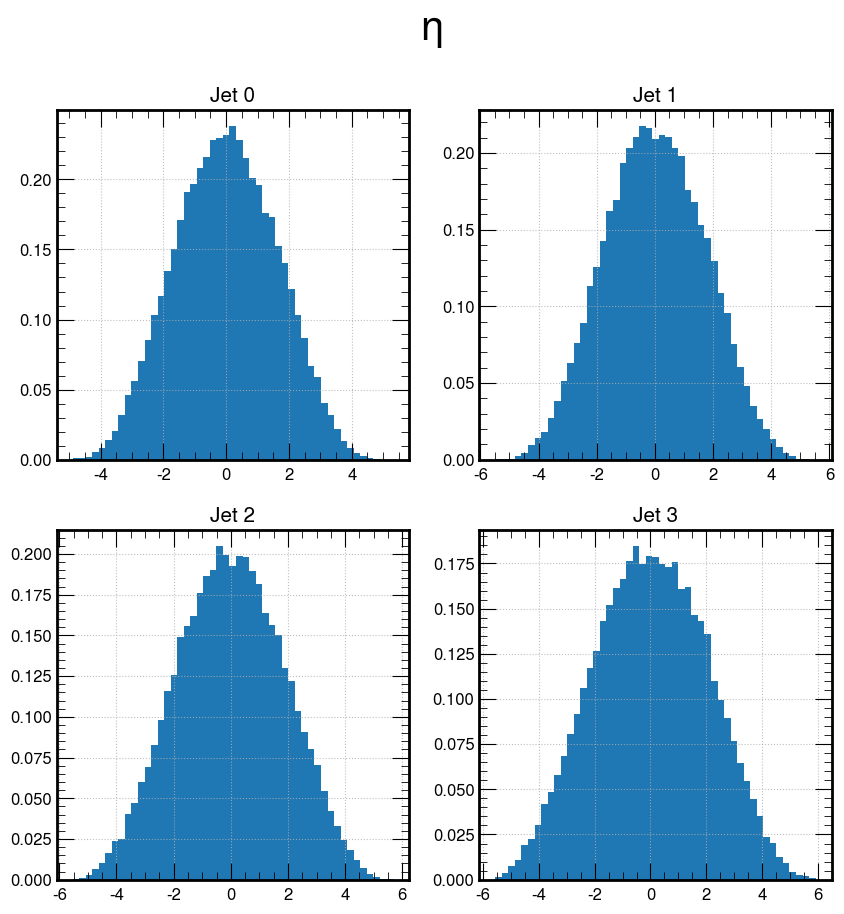

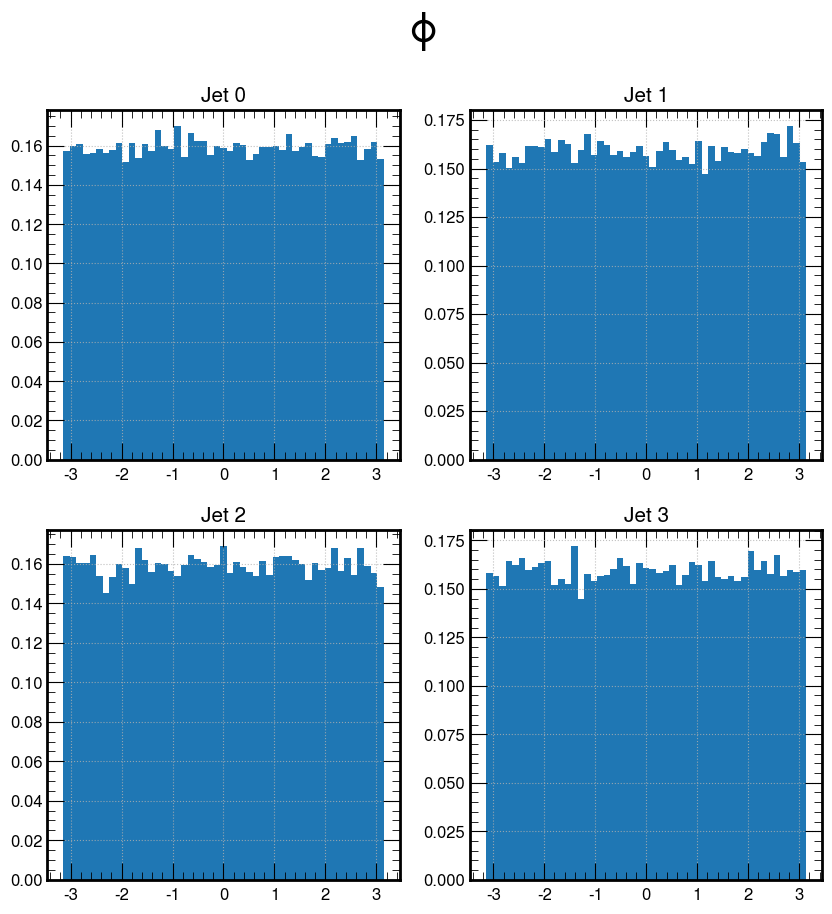

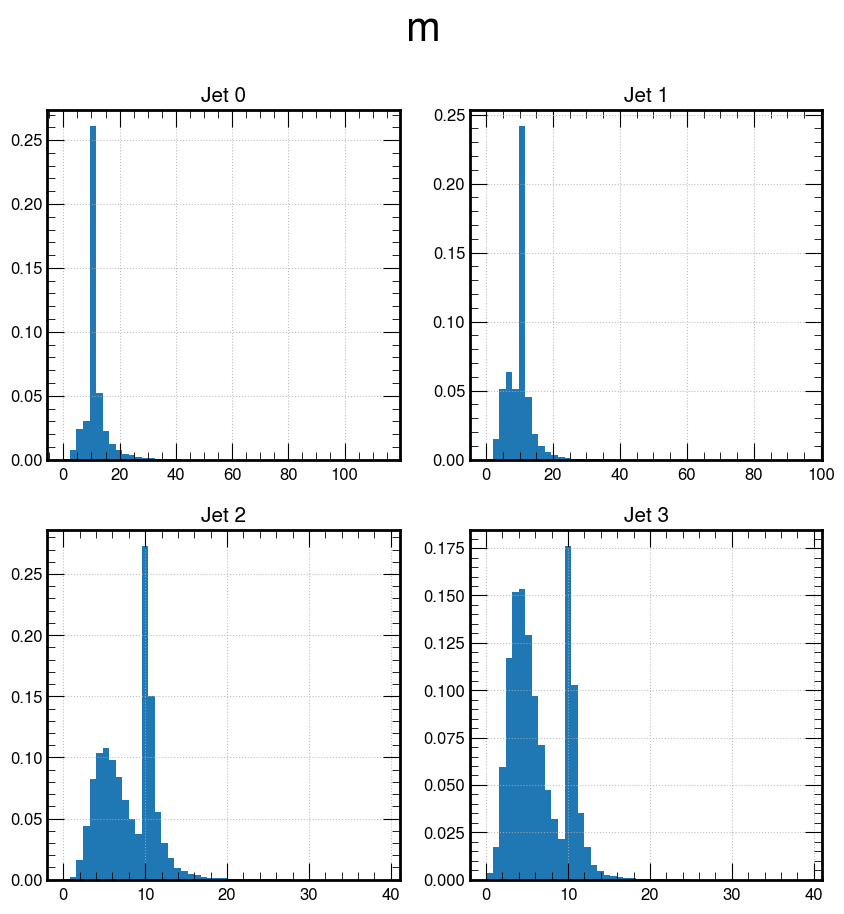

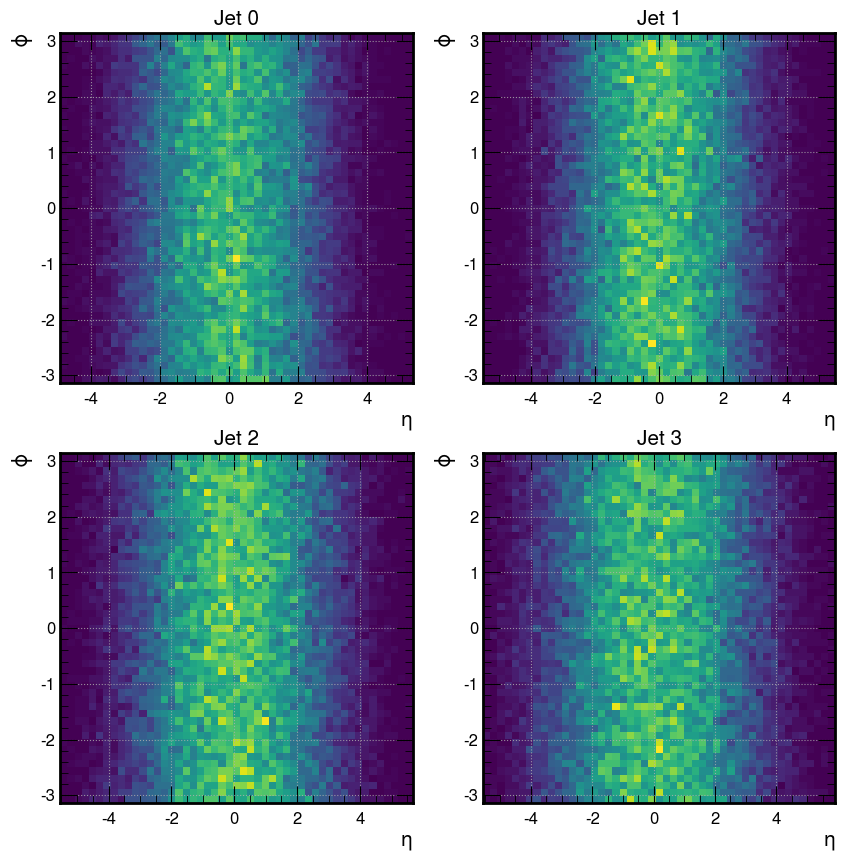

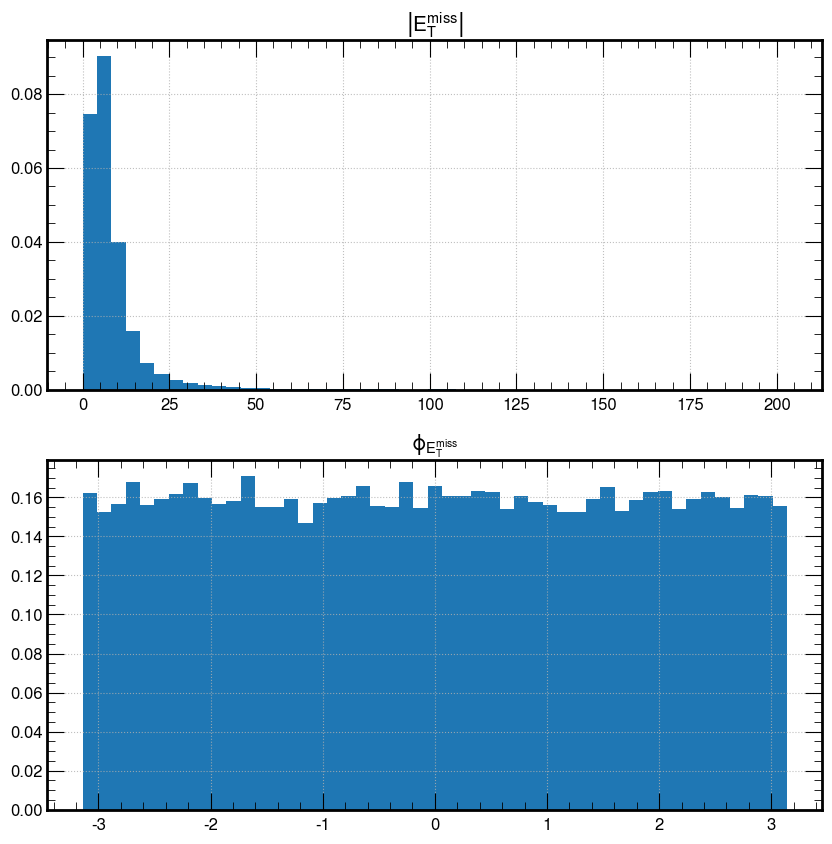

In [12]:
folder = 'Plots/gSq/'
# pt
PlotCinematicVariable(data_gSq, 'pt', r'$p_{T}$', folder=folder)
# eta
PlotCinematicVariable(data_gSq, 'eta', r'$\eta$', folder=folder)
# phi
PlotCinematicVariable(data_gSq, 'phi', r'$\phi$', folder=folder)
# mass
PlotCinematicVariable(data_gSq, 'mass', r'$m$', folder=folder)
# Eta Phi Plane
PlotEtaPhiPlane(data_gSq, folder=folder)
# missinget
PlotMissingETVariable(data_gSq, folder=folder)